## Logistic Regression Excercise

In [22]:
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import pandas as pd
import seaborn as sb
from ydata_profiling import ProfileReport
%matplotlib inline

#### Import

In [23]:
data = pd.read_csv(r'c:\Users\massimiliano.canosi\Documents\Machine-Learning-Training-Journey\Data\Admission_Predict.csv')

#### Dataset Info

In [24]:
data.head(5)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4 4.50  4.50  9.65   
1           2        324          107                  4 4.00  4.50  8.87   
2           3        316          104                  3 3.00  3.50  8.00   
3           4        322          110                  3 3.50  2.50  8.67   
4           5        314          103                  2 2.00  3.00  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [26]:
# check mean and median for outliers
data.describe()

Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
count      400.00     400.00       400.00             400.00 400.00 400.00   
mean       200.50     316.81       107.41               3.09   3.40   3.45   
std        115.61      11.47         6.07               1.14   1.01   0.90   
min          1.00     290.00        92.00               1.00   1.00   1.00   
25%        100.75     308.00       103.00               2.00   2.50   3.00   
50%        200.50     317.00       107.00               3.00   3.50   3.50   
75%        300.25     325.00       112.00               4.00   4.00   4.00   
max        400.00     340.00       120.00               5.00   5.00   5.00   

        CGPA  Research  Chance of Admit   
count 400.00    400.00            400.00  
mean    8.60      0.55              0.72  
std     0.60      0.50              0.14  
min     6.80      0.00              0.34  
25%     8.17      0.00              0.64  
50%     8.61      1.00              0.73  
75%     9.06      1.00              0.83  
max     9.92      1.00              0.97

#### // SOP (Statement of Purpose)
##### A Statement of Purpose (SOP) is a document that outlines your academic and professional background, your reasons for pursuing the particular program, and your future career goals. It provides the admissions committee with a better understanding of your motivations, aspirations, and suitability for the program.

#### // LOR (Letter of Recommendation)
##### A Letter of Recommendation (LOR) is a written endorsement of an applicant’s abilities, accomplishments, and character, typically written by a professor, employer, or someone who has closely worked with the applicant. It provides an external perspective on the applicant’s qualifications and potential.


#### // CGPA (Cumulative Grade Point Average)
##### The Cumulative Grade Point Average (CGPA) is a measure of a student's academic performance across all courses taken over a specified period, typically on a scale of 0 to 10 or 0 to 4, depending on the country or institution.


In [27]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
data = data.rename(columns={'Chance of Admit ': 'Chance of Admit'})

In [29]:
pf = ProfileReport(data, title="DataSet Profiling Report")
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Visualization

In [30]:
y = data[['Chance of Admit']]
X = data.drop(['Serial No.', 'Chance of Admit', 'CGPA'], axis=1)

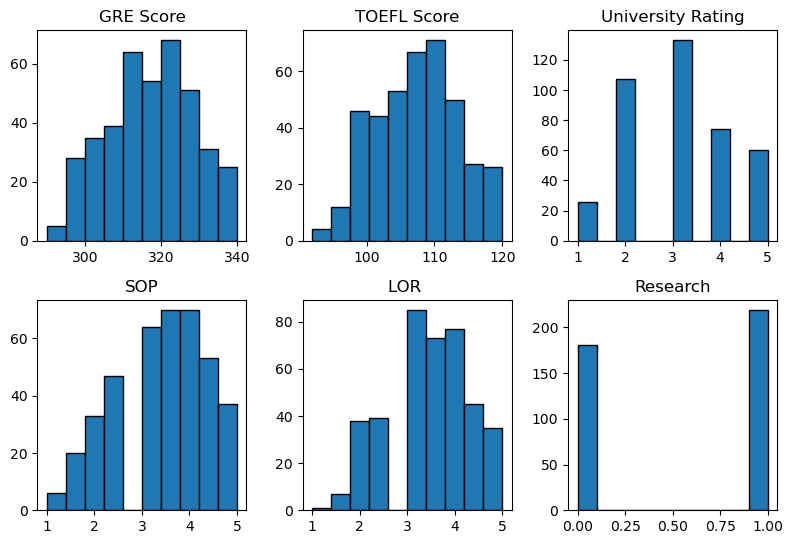

In [31]:
cols_no = X.shape[1]
cols = X.columns

fig = plt.figure(figsize=(8,8))

for i in range(cols_no):

    ax = plt.subplot(3,3, i+1)
    ax.hist(X[cols[i]], edgecolor = 'black')
    ax.set_title(cols[i])

plt.tight_layout()
plt.show()

##### SOP and LOR are skewed to the left. Reason: for a good application you need to have a better scores at these exams.

##### GRE distribution: The bimodal distribution hints at underlying subgroups that could be further investigated. For instance, separating the data by gender or other demographic factors might reveal that one peak corresponds to one subgroup (e.g., male students) and the other peak to another (e.g., female students). 

### Correlations

In [32]:
correlation = X.corr(numeric_only=True)
correlation

GRE Score  TOEFL Score  University Rating  SOP  LOR   \
GRE Score               1.00         0.84               0.67 0.61  0.56   
TOEFL Score             0.84         1.00               0.70 0.66  0.57   
University Rating       0.67         0.70               1.00 0.73  0.66   
SOP                     0.61         0.66               0.73 1.00  0.73   
LOR                     0.56         0.57               0.66 0.73  1.00   
Research                0.58         0.49               0.45 0.44  0.40   

                   Research  
GRE Score              0.58  
TOEFL Score            0.49  
University Rating      0.45  
SOP                    0.44  
LOR                    0.40  
Research               1.00

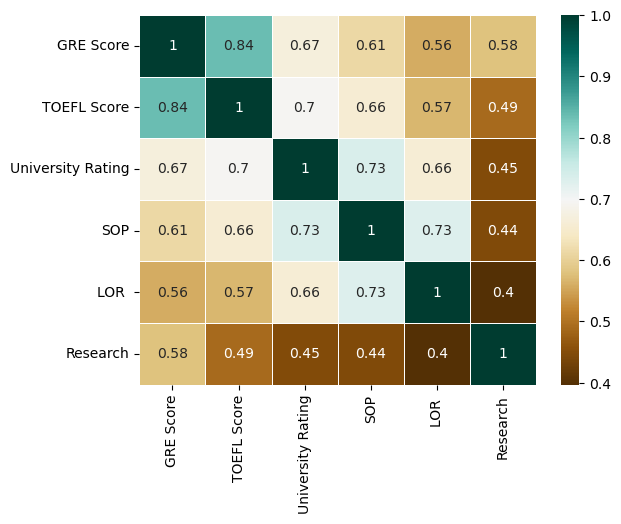

In [33]:
heatmap = sb.heatmap(correlation, cmap='BrBG', annot=True, linewidths=0.5)

## Training and Testing - Logistic Regression

In [34]:
y['Adjusted'] = y['Chance of Admit'].apply(lambda x:1 if x >= 0.65 else 0)

y_logreg = y[['Adjusted']].copy()

In [35]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y_logreg, train_size= 0.75, random_state= 42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### Evaluate Models

In [36]:
# Fit and evaluate multiple regression models
from lazypredict.Supervised import LazyClassifier

reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

 31%|███       | 9/29 [00:00<00:00, 31.96it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:00<00:00, 37.35it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 220, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.733333 -> initscore=1.011601
[LightGBM] [Info] Start training from score 1.011601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.82               0.83     0.83      0.82   
NearestCentroid                    0.82               0.83     0.83      0.82   
PassiveAggressiveClassifier        0.83               0.81     0.81      0.83   
LGBMClassifier                     0.85               0.81     0.81      0.85   
GaussianNB                         0.81               0.80     0.80      0.81   
BaggingClassifier                  0.84               0.79     0.79      0.83   
DecisionTreeClassifier             0.80               0.77     0.77      0.80   
ExtraTreeClassifier                0.80               0.76     0.76      0.80   
QuadraticDiscriminantAnalysis      0.80               0.75     0.75      0.79   
SGDClassifier                      0.81               0.75     0.75      0.80   
RandomForestClassifier             0.81               0.75     0.75      0.80   
Perceptron                         0.81               0.75     0.75      0.80   
AdaBoostClassifier                 0.81               0.74     0.74      0.80   
LinearDiscriminantAnalysis         0.80               0.74     0.74      0.79   
LogisticRegression                 0.80               0.74     0.74      0.79   
ExtraTreesClassifier               0.80               0.74     0.74      0.79   
CalibratedClassifierCV             0.80               0.74     0.74      0.79   
LinearSVC                          0.80               0.74     0.74      0.79   
RidgeClassifierCV                  0.79               0.72     0.72      0.78   
SVC                                0.80               0.72     0.72      0.78   
RidgeClassifier                    0.78               0.71     0.71      0.76   
XGBClassifier                      0.77               0.70     0.70      0.76   
KNeighborsClassifier               0.77               0.69     0.69      0.75   
NuSVC                              0.79               0.69     0.69      0.76   
LabelSpreading                     0.72               0.67     0.67      0.72   
LabelPropagation                   0.72               0.67     0.67      0.72   
DummyClassifier                    0.67               0.50     0.50      0.54   

                               Time Taken  
Model                                      
BernoulliNB                          0.01  
NearestCentroid                      0.01  
PassiveAggressiveClassifier          0.01  
LGBMClassifier                       0.04  
GaussianNB                           0.01  
BaggingClassifier                    0.03  
DecisionTreeClassifier               0.01  
ExtraTreeClassifier                  0.01  
QuadraticDiscriminantAnalysis        0.01  
SGDClassifier                        0.01  
RandomForestClassifier               0.18  
Perceptron                           0.01  
AdaBoostClassifier                   0.09  
LinearDiscriminantAnalysis           0.01  
LogisticRegression                   0.01  
ExtraTreesClassifier                 0.11  
CalibratedClassifierCV               0.03  
LinearSVC                            0.01  
RidgeClassifierCV                    0.02  
SVC                                  0.01  
RidgeClassifier                      0.01  
XGBClassifier                        0.06  
KNeighborsClassifier                 0.01  
NuSVC                                0.02  
LabelSpreading                       0.01  
LabelPropagation                     0.01  
DummyClassifier                      0.01

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [38]:
# import the metrics class
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18, 15],
       [ 5, 62]], dtype=int64)

<Axes: >

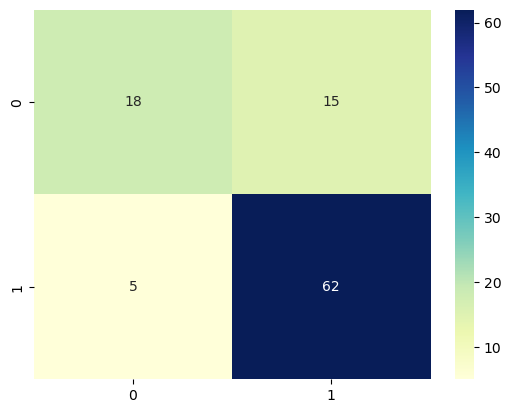

In [39]:
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

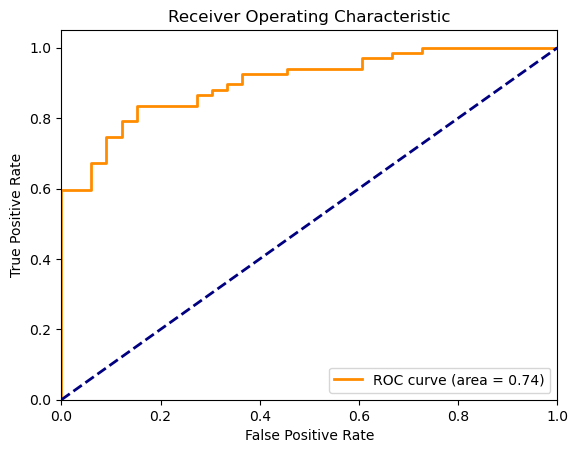

In [40]:
# Calculate ROC curve and ROC area under curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [41]:
from sklearn.metrics import classification_report

target_names = ['Admitted', 'Not Admitted']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Admitted       0.78      0.55      0.64        33
Not Admitted       0.81      0.93      0.86        67

    accuracy                           0.80       100
   macro avg       0.79      0.74      0.75       100
weighted avg       0.80      0.80      0.79       100

